In [54]:
import os
import pandas as pd
import json
import folium
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
%matplotlib inline  

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO



In [14]:
transactions = pd.read_csv('../../data/transactions.small.csv')
transactions = transactions.rename(columns={'id':'tid'})
transactions['month'] = transactions['date'].apply(lambda x: int(x.split('/')[0]))
transactions['day'] = transactions['date'].apply(lambda x: int(x.split('/')[1]))
transactions['year'] = transactions['date'].apply(lambda x: int(x.split('/')[2]))
transactions['time'] = pd.to_datetime(transactions['time'])
transactions['amount'] = transactions.amount.astype(float)

In [21]:
clients = pd.read_csv('../../data/clients.small.csv')['id']
companies = pd.read_csv('../../data/companies.small.csv')['id']
atms = pd.read_csv('../../data/atms.small.csv')['id']
all_ids = pd.concat((clients, companies, atms),axis=0)
id_list = all_ids.values.astype(str)
id_dict = {v:e for e,v in enumerate(id_list)}

In [22]:
transaction_pairs = transactions[['source', 'target']]
transaction_pairs['source'] = transaction_pairs.source.apply(lambda x: id_dict[x])
transaction_pairs['target'] = transaction_pairs.target.apply(lambda x: id_dict[x])


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [49]:
transactions_tuples = [(x[0], x[1]) for x in transaction_pairs.values]
transaction_counts = Counter(transactions_tuples)
values_list = list(transaction_counts.values())
index_tuples = list(transaction_counts.keys())
row_indices = [x[0] for x in index_tuples]
column_indices = [x[1] for x in index_tuples]
adj_matrix = csr_matrix((values_list, (row_indices, column_indices)), shape=(len(id_list), len(id_list)), dtype=float)


In [50]:
adj_matrix

<1026x1026 sparse matrix of type '<class 'numpy.float64'>'
	with 6867 stored elements in Compressed Sparse Row format>

In [131]:
k = 100
model = KMeans(n_clusters=k)
results = model.fit_predict(adj_matrix)

In [132]:
results

array([25, 25, 25, ..., 25, 25, 25])

In [133]:
pca_dims = 20
pca_model = PCA(n_components=20)
reduced_adj_matrix = model.fit_transform(adj_matrix)

In [134]:
def plot_cluster(data, assignments, colors, ax, n_clusters, i):
    """plot the cluster.

    Note that the dimension of the column vector `colors`
    should be the same as the number of clusters.
    """
    # check if the dimension matches.
    for k_th in range(n_clusters):
        #rows, cols = np.where(assignments == k_th)
        rows = np.where(assignments == k_th)[0]
        data_of_kth_cluster = data[rows, :]
        ax.scatter(
            data_of_kth_cluster[:, 2*i],
            data_of_kth_cluster[:, 2*i+1],
            s=40, c=colors[k_th])
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
def plot(data, assignments, n_clusters, mu, i):
    """plot."""
    colors = ['red', 'blue', 'green', 'black', 'orange', 'yellow', 'magenta', 'cyan']*4
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    plot_cluster(data, assignments, colors, ax1, n_clusters, i)
    ax1.scatter(mu[:, 2*i], mu[:, 2*i+1],
                facecolors='none', edgecolors='y', s=80)

    # matplotlib.rc('xtick', labelsize=5)
    # matplotlib.rc('ytick', labelsize=5)

    plt.tight_layout()
    #plt.savefig(out_dir)
    plt.show()
    plt.close()

def plot_2(data, assignments, n_clusters, mu, i):
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    #plot_cluster(data, assignments, colors, ax1, n_clusters, i)
    ax1.scatter(data[:, i], assignments,
                facecolors='none', edgecolors='y', s=80)

    # matplotlib.rc('xtick', labelsize=5)
    # matplotlib.rc('ytick', labelsize=5)

    plt.tight_layout()
    #plt.savefig(out_dir)
    plt.show()
    plt.close()

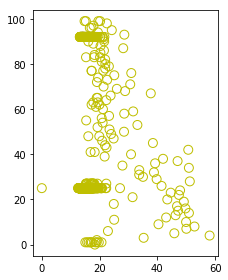

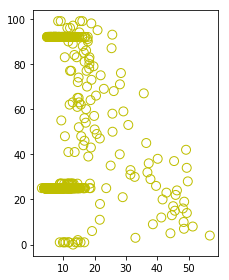

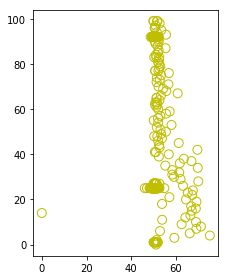

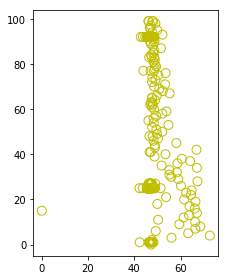

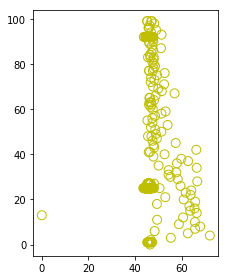

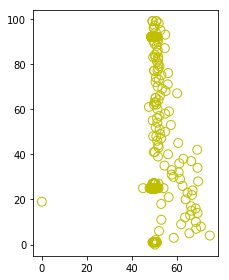

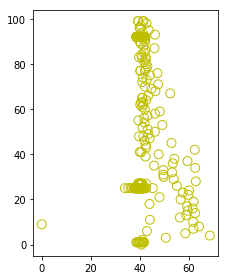

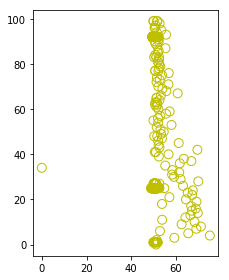

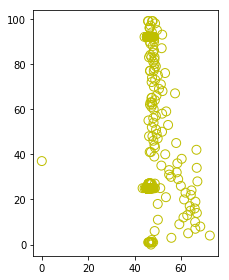

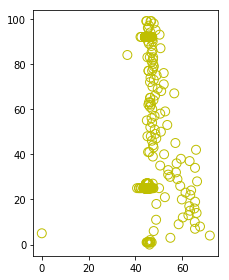

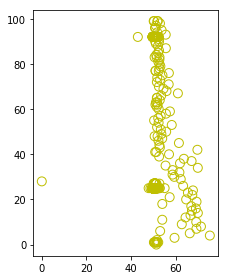

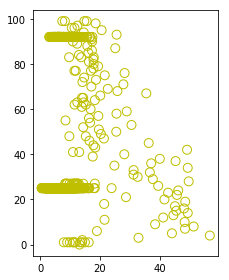

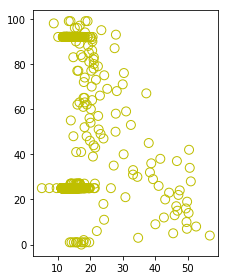

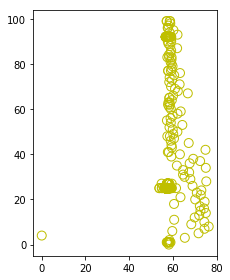

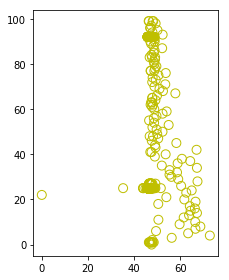

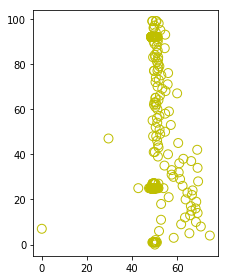

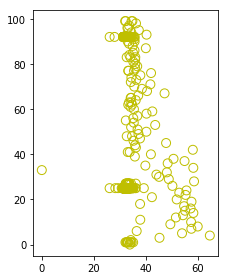

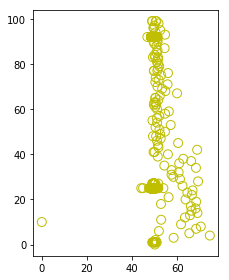

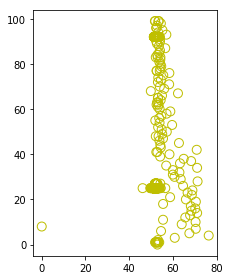

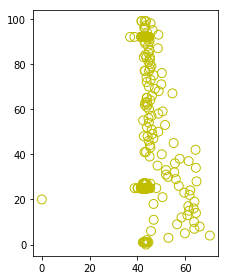

In [135]:
for i in range(pca_dims):
    plot_2(reduced_adj_matrix, assignments=results, n_clusters=k, mu=model.cluster_centers_, i=i)

In [138]:
'ab asd wor wfpoejweohf wfhuewf'.split()[1:]

['asd', 'wor', 'wfpoejweohf', 'wfhuewf']